In [65]:
import cv2
import PIL
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

import torch
from torch import nn
from torch.autograd import Variable, Function
from torchvision import models, transforms

%matplotlib inline

In [137]:
path = "/home/lestsovba/pic/car.jpg"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)

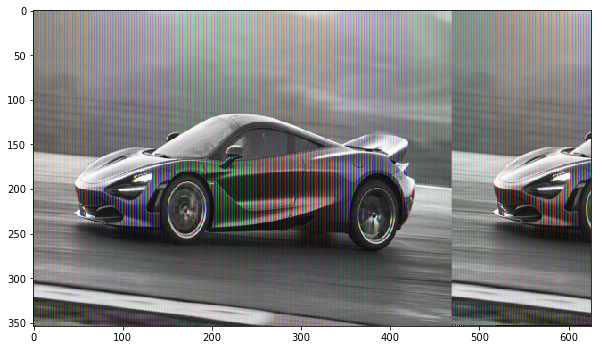

In [138]:
plt.figure(figsize=(10,8))
plt.imshow(img)

In [68]:
torch.cuda.set_device(3)

In [121]:
vgg = models.vgg11(pretrained=True).eval()
#vgg.features = torch.nn.DataParallel(vgg.features)
vgg.cuda()

VGG (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU (inplace)
    (2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU (inplace)
    (5): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU (inplace)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU (inplace)
    (10): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU (inplace)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU (inplace)
    (15): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (16): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU (inpla

In [122]:
f = open(path, 'rb')
im1 = Image.open(f)

In [123]:
normalize = transforms.Normalize(mean=[0.406, 0.456, 0.485],
                                 std=[0.225, 0.224, 0.229])
tr = transforms.Compose([
        transforms.Scale(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize,
        ])

img = tr(im1)
img = Variable(img, requires_grad=False).unsqueeze(0).cuda()

In [124]:
tmp = "".join(open("labels.txt", 'r').readlines()).replace("\n", "")
labeldict = eval(tmp)

In [131]:
res = vgg.forward(img)

res = nn.Softmax()(res)
prob, ind = torch.topk(res, 5)

for i in range(ind.size()[1]):
    print(labeldict[ind[0][i].data[0]], " : ", prob[0][i].data[0])

Egyptian cat  :  0.3176305294036865
tabby, tabby cat  :  0.31612494587898254
tiger cat  :  0.28791549801826477
lynx, catamount  :  0.06364203989505768
Persian cat  :  0.004000979475677013


In [18]:
for i in vgg.features:
    print(i, type(i))

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) <class 'torch.nn.modules.conv.Conv2d'>
ReLU (inplace) <class 'torch.nn.modules.activation.ReLU'>
MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1)) <class 'torch.nn.modules.pooling.MaxPool2d'>
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) <class 'torch.nn.modules.conv.Conv2d'>
ReLU (inplace) <class 'torch.nn.modules.activation.ReLU'>
MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1)) <class 'torch.nn.modules.pooling.MaxPool2d'>
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) <class 'torch.nn.modules.conv.Conv2d'>
ReLU (inplace) <class 'torch.nn.modules.activation.ReLU'>
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) <class 'torch.nn.modules.conv.Conv2d'>
ReLU (inplace) <class 'torch.nn.modules.activation.ReLU'>
MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1)) <class 'torch.nn.modules.pooling.MaxPool2d'>
Conv2d(256, 512, kernel_size=(3, 3), stri